# Advanced Analysis 

This Notebook will contain Advanced analysis techniques and results.

### Step 1 Correlation validation of experience to salary

Tables in database:
                 name
0  salary_data_clean
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
Pearson Correlation (Experience ↔ Salary): 0.809
P-value: 0.00000


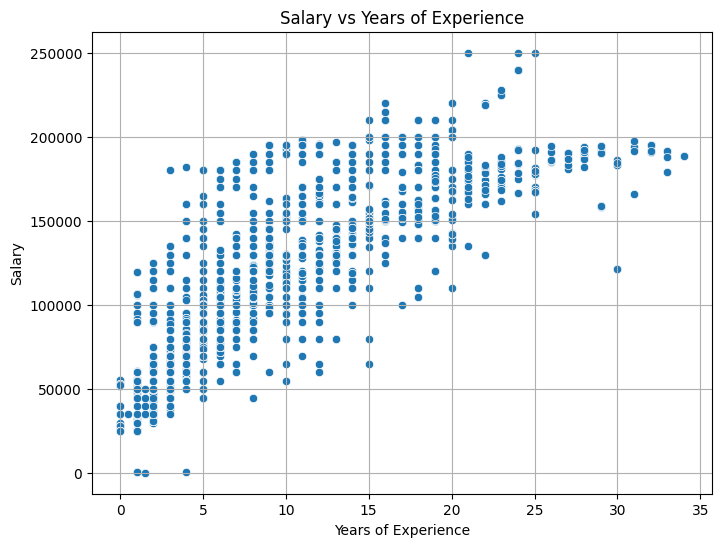

Trend Line Equation: Salary = 7046.73 * Experience + 58284.69


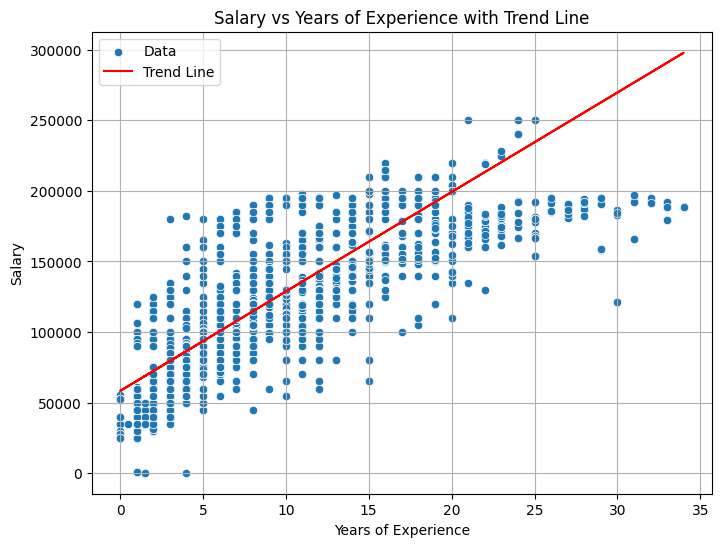

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# -----------------------------
# 1. Connect to the database
# -----------------------------
db_path = "../data/salary_data_clean.db"
conn = sqlite3.connect(db_path)

# -----------------------------
# 2. List tables (to confirm table name)
# -----------------------------
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in database:\n", tables)

# -----------------------------
# 3. Load the salary data table
# -----------------------------
# Replace 'salary_data_clean' below with the actual table name if different
table_name = 'salary_data_clean'  
df = pd.read_sql(f"SELECT * FROM {table_name};", conn)

conn.close()

# Show the first few rows to verify data loaded correctly
print(df.head())

# -----------------------------
# 4. Step 1.1 - Calculate Pearson Correlation
# -----------------------------
experience = df['Years of Experience']
salary = df['Salary']

corr, p_value = pearsonr(experience, salary)
print(f"Pearson Correlation (Experience ↔ Salary): {corr:.3f}")
print(f"P-value: {p_value:.5f}")

# -----------------------------
# 5. Step 1.2 - Scatter Plot
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=experience, y=salary)
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

# -----------------------------
# 6. Step 1.3 - Trend Line (Simple Linear Regression)
# -----------------------------
coefficients = np.polyfit(experience, salary, 1)  # Linear fit
slope, intercept = coefficients
print(f"Trend Line Equation: Salary = {slope:.2f} * Experience + {intercept:.2f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=experience, y=salary, label="Data")
plt.plot(experience, slope * experience + intercept, color='red', label="Trend Line")
plt.title("Salary vs Years of Experience with Trend Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

### Step 2 Analyze Correlations within Specifc Job Title

Job titles with >100 entries:
Job Title
Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          308
Marketing Manager            255
Senior Software Engineer     244
Back end Developer           244
Front end Developer          241
Marketing Coordinator        158
Junior Sales Associate       142
Financial Manager            134
Marketing Analyst            132
Software Developer           125
Operations Manager           114
Human Resources Manager      104
Name: count, dtype: int64
                    Job Title  Count  Correlation        P-value         Slope
0     Human Resources Manager    104     0.998186  2.642903e-126   8878.306878
1          Software Developer    125     0.959579   1.406259e-69   6806.250000
2           Financial Manager    134     0.959566   1.535764e-74  11288.546436
3           Marketing An

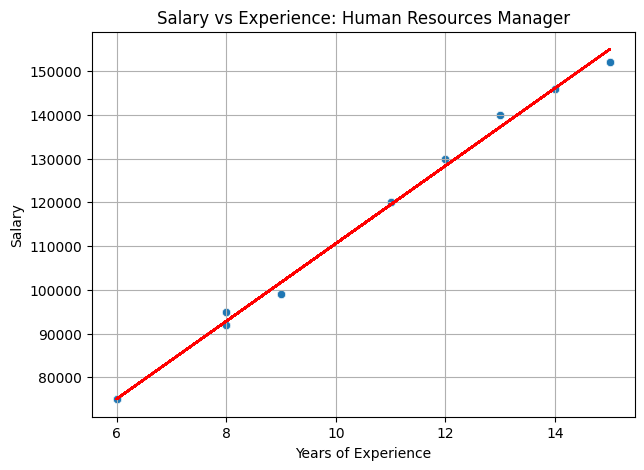

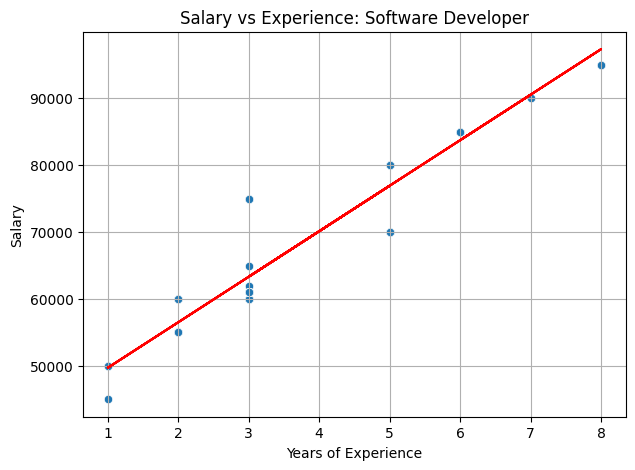

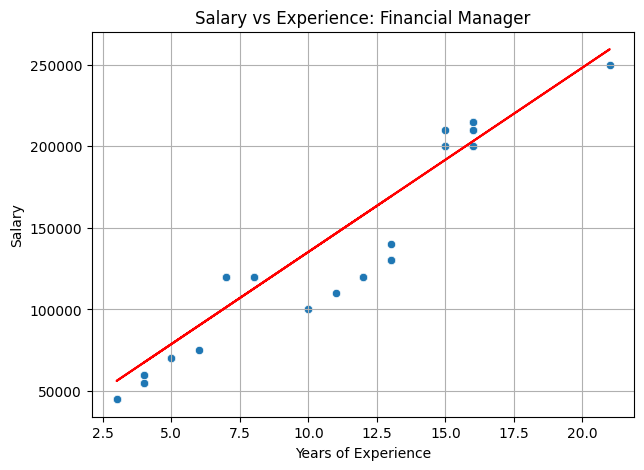

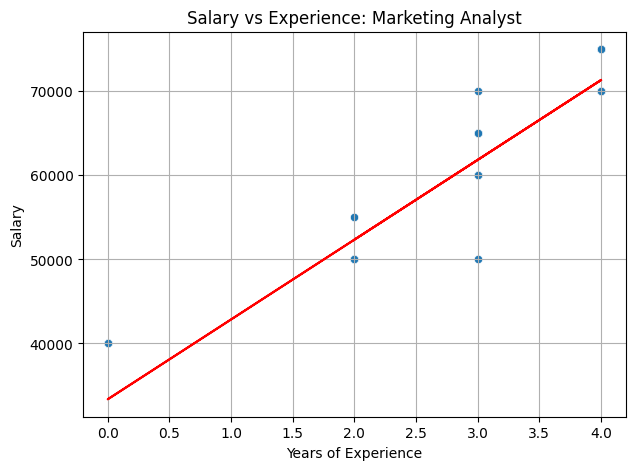

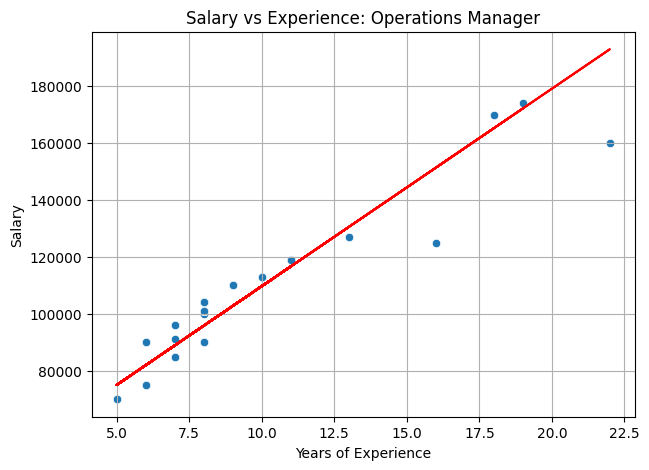

In [2]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Count entries per Job Title
# -----------------------------
job_counts = df['Job Title'].value_counts()
print("Job titles with >100 entries:")
print(job_counts[job_counts > 100])

# -----------------------------
# 2. Filter job titles with >100 entries
# -----------------------------
titles_to_analyze = job_counts[job_counts > 100].index
df_filtered = df[df['Job Title'].isin(titles_to_analyze)]

# -----------------------------
# 3. Group by Job Title and calculate correlation
# -----------------------------
summary_list = []

for title, group in df_filtered.groupby('Job Title'):
    experience = group['Years of Experience']
    salary = group['Salary']
    if len(group) > 1:  # Ensure at least 2 data points
        corr, p_value = pearsonr(experience, salary)
        # Linear regression slope
        slope = (salary.corr(experience) * salary.std()) / experience.std()
        summary_list.append({
            'Job Title': title,
            'Count': len(group),
            'Correlation': corr,
            'P-value': p_value,
            'Slope': slope
        })

summary_df = pd.DataFrame(summary_list)
summary_df = summary_df.sort_values(by='Correlation', ascending=False)
summary_df.reset_index(drop=True, inplace=True)

# -----------------------------
# 4. Show summary
# -----------------------------
print(summary_df)

# -----------------------------
# 5. Optional: Plot top 5 job titles by correlation
# -----------------------------
top_titles = summary_df.head(5)['Job Title']

for title in top_titles:
    group = df_filtered[df_filtered['Job Title'] == title]
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=group['Years of Experience'], y=group['Salary'])
    slope, intercept = np.polyfit(group['Years of Experience'], group['Salary'], 1)
    plt.plot(group['Years of Experience'], slope*group['Years of Experience'] + intercept, color='red')
    plt.title(f"Salary vs Experience: {title}")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.grid(True)
    plt.show()